In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [11]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS
# start the KNN training
imputed_training=fast_knn(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].values, k=30)
df_t1 = pd.DataFrame(imputed_training,columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI'])
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_t1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:>

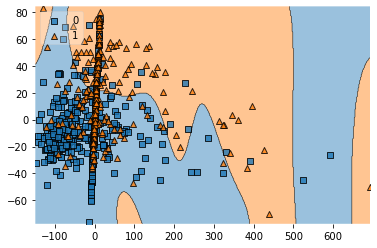

In [25]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y=df['Outcome']

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X)
clf.fit(X_train2, df['Outcome'].astype(int).values)
plot_decision_regions(X_train2, df['Outcome'].astype(int).values, clf=clf, legend=2)

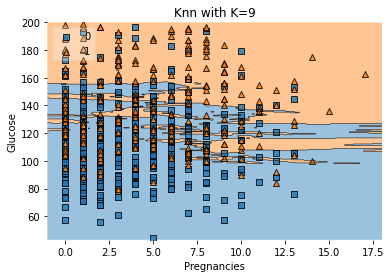

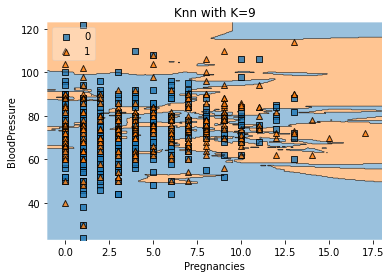

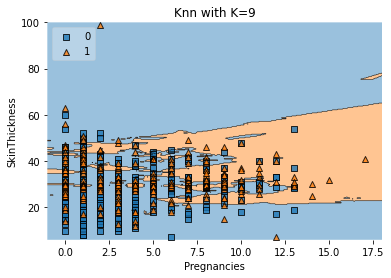

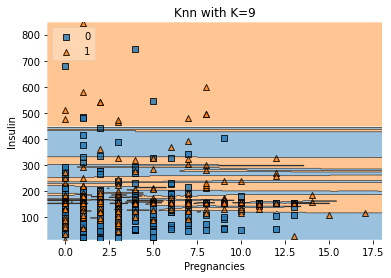

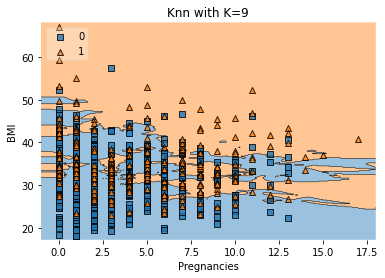

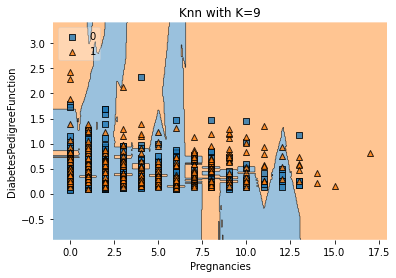

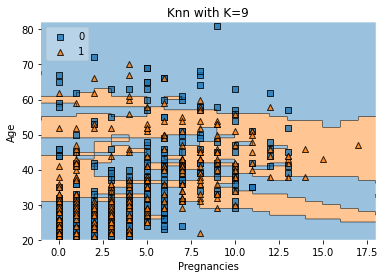

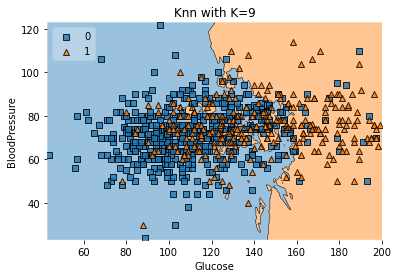

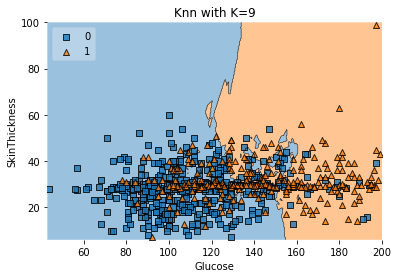

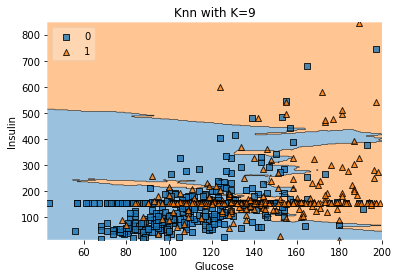

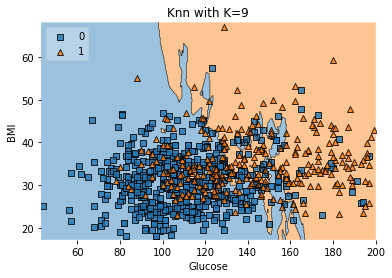

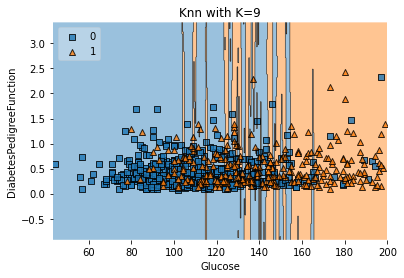

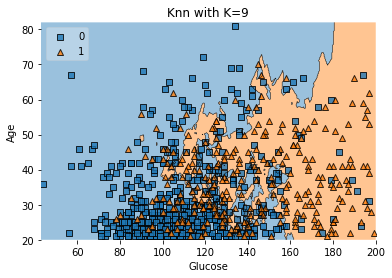

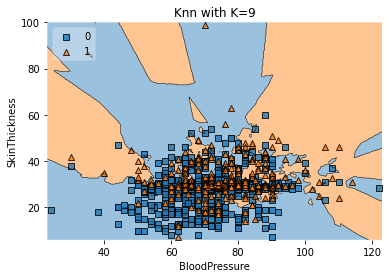

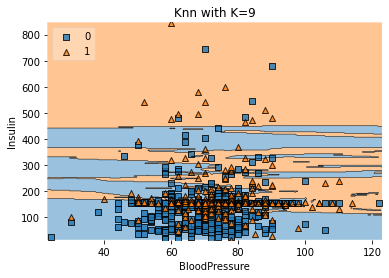

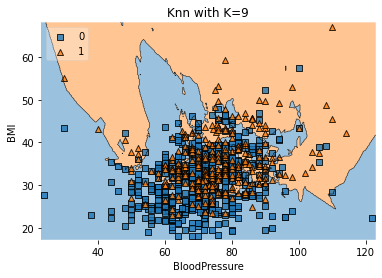

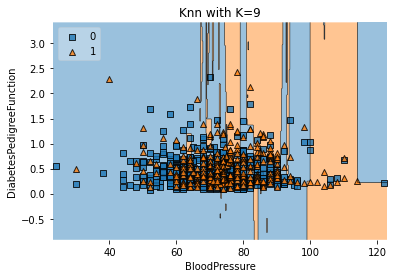

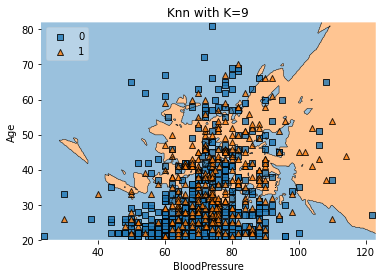

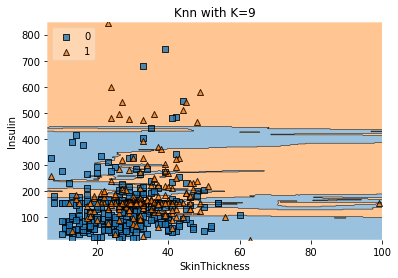

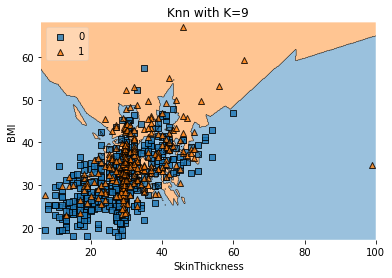

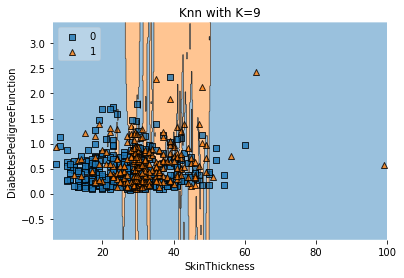

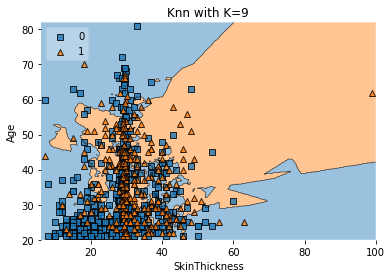

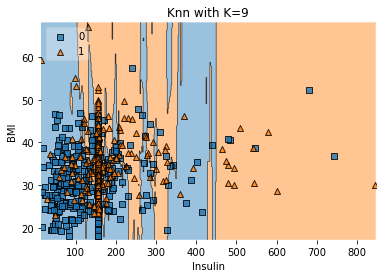

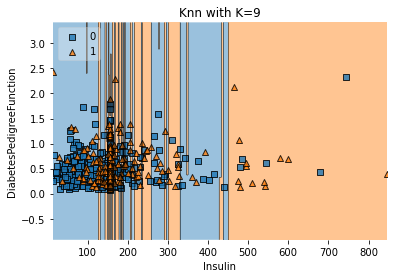

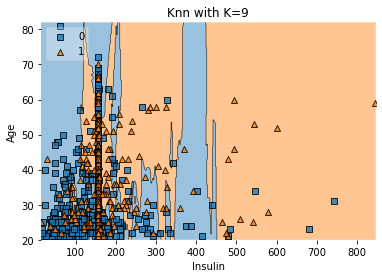

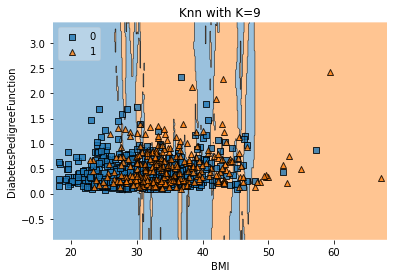

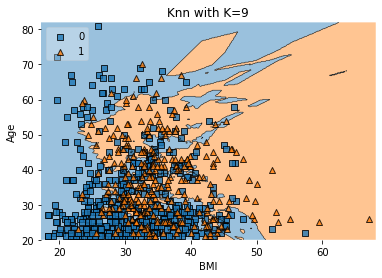

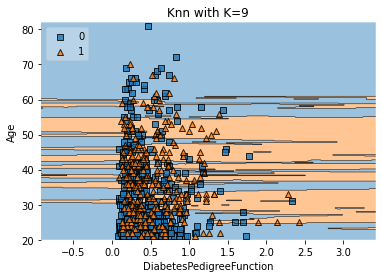

In [26]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
def ok(X,Y):
  x = df[[X,Y]].values
  y = df['Outcome'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=9)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(9))
  plt.show()

tt = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
ll = len(tt)
for i in range(0,ll):
  for j in range(i+1,ll):
    ok(tt[i],tt[j])

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Outcome', axis = 1))
scaler_features = scaler.transform(df.drop('Outcome', axis = 1))
df_feat = pd.DataFrame(scaler_features, columns = df.columns[:-1])
# appending the outcome feature
df_feat['Outcome'] = df['Outcome'].astype(int)
df = df_feat.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865905,-0.035362,0.664068,-0.000278,0.168829,0.468492,1.425995,1
1,-0.844885,-1.204923,-0.531459,-0.017854,0.000021,-0.849667,-0.365061,-0.190672,0
2,1.233880,2.016365,-0.696824,-0.048445,0.004160,-1.329816,0.604397,-0.105584,1
3,-0.844885,-1.073442,-0.531459,-0.699775,-0.724364,-0.631418,-0.920763,-1.041549,0
4,-1.141852,0.504332,-2.681211,0.664068,0.146571,1.551075,5.484909,-0.020496,1


In [28]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.3, random_state=0)

In [29]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
tt = {}
il = []
ac=[]
for  i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    il.append(i)
    ac.append( sklearn.metrics.roc_auc_score(y_test,y_pred) )
    tt.update({'K':il})
    tt.update({'ROC_ACC':ac})
vv = pd.DataFrame(tt)
vv.sort_values('ROC_ACC',ascending=False,inplace=True,ignore_index=True)
vv.head(10)

,K,ROC_ACC
0,9,0.739972
1,5,0.723662
2,3,0.720477
3,7,0.716905
4,11,0.716905
5,10,0.708986
6,13,0.706576
7,15,0.706189
8,17,0.702617
9,4,0.701455


In [30]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.71      0.59      0.65        74

    accuracy                           0.79       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.79      0.79      0.79       231



[[139  18]
 [ 30  44]]


<AxesSubplot:>

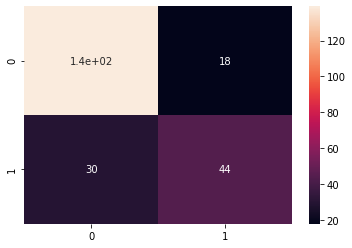

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
